# Methoden en Technieken -- Blok 2

## Datapunt Opdracht

In deze opdracht worden de volgende leeruitkomsten getoetst, relevante termen zijn **dik** gedrukt:
- B2: Je stelt op basis van requirements een **geschikte architectuur** voor een AI-oplossing op en selecteert daarvoor passende AI-technieken, gebruik makend van **machine learning**, **deep learning**, **kennisrepresentatie**, **computer vision** en natural language processing.
- B3: Je prepareert een dataset voor het **trainen en testen** van een AI-model rekening houdend met technische en ethische randvoorwaarden.
- B4: **Je ontwikkelt, traint en evalueert een AI-model** volgens een **iteratief proces**.
- C2: **Je evalueert en beoordeelt de kwaliteit van een AI-model aan de hand van kwaliteitscriteria** die in het vakgebied erkend worden waaronder robustness, **performance**, scalability, explainability, model complexity en resource demand.

## De opdracht

In de slides van les 12 word beschreven hoe we een Deep Belief Netwerk unsupervised trainen op de MNIST data. 

In deze opdracht gaan we dit gebruiken om een MNIST classifier semi-supervised te trainen. We doen hier alsof slechts 500 van de 70000 MNIST afbeeldingen gelabeld zijn (zie code hieronder, deze maakt de data aan die je mag gebruiken). Je zult dus:
- Een DBN unsupervised trainen op de data
- Een classifier trainen op de latent space van de DBN en de gelabelde data

Je mag zelf kiezen:
- De architectuur van de DBN (let op, deze zal wat tijd kosten om te trainen)
- De classifier op de latent space (alles is toegestaan)
- Hoe je de modellen beoordeelt

Probeer een zo'n goed mogelijk model te krijgen (in een redelijke tijd), verantwoord je keuzes. Bespreek je uiteindelijke model in detail, eerdere pogingen/modellen mogen korter besproken worden.


In [29]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pickle

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import BernoulliRBM
from ipywidgets import interactive

In [30]:
(x1, y), (x2, _) = keras.datasets.mnist.load_data()
x = np.concatenate((x1, x2))

x = np.expand_dims(x, -1).astype("float32") / 255

y = y[:500]

del x1, x2

In [31]:
# Select the first 500 labels as labeled data
labeled_x = x[:500]
labeled_y = y[:500]

# The rest are unlabeled data
unlabeled_x = x[500:]

Split it by catagory and not random. (stratisfied split)

In [32]:
X_labeled_train, x_labeled_remaining, y_labeled_train,  y_labeled_remaining = train_test_split(labeled_x, labeled_y, test_size=0.3, random_state = 42)
X_labeled_validation, X_labeled_test,y_labeled_validation,  y_test = train_test_split(x_labeled_remaining, y_labeled_remaining, test_size=0.5, random_state = 42)
y_labeled_train = keras.utils.to_categorical(y_labeled_train, 10)
y_labeled_validation = keras.utils.to_categorical(y_labeled_validation, 10)
y_labeled_test = keras.utils.to_categorical(y_test, 10)

In [33]:
print(X_labeled_train.shape)

(350, 28, 28, 1)


In [34]:
unlabeled_x = unlabeled_x.reshape(len(unlabeled_x), -1)
X_labeled_train = X_labeled_train.reshape(len(X_labeled_train), -1)
X_labeled_validation = X_labeled_validation.reshape(len(X_labeled_validation), -1)
X_labeled_test = X_labeled_test.reshape(len(X_labeled_test), -1)

In [35]:
print(X_labeled_train.shape)

(350, 784)


Shape of y_labeled_train_single: (350,)
Shape of X_labeled_train_pca: (350, 10)


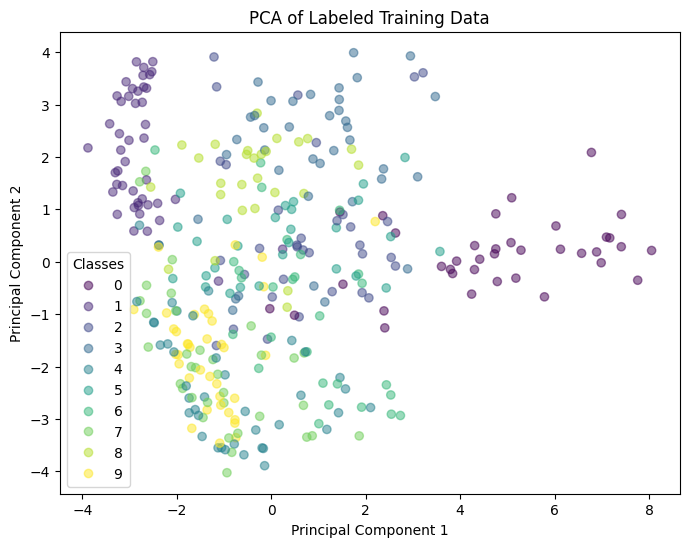

In [ ]:
import PCA

# Initialize PCA
pca = PCA(n_components=10)

# Convert one-hot encoded labels to single labels
y_labeled_train_single = np.argmax(y_labeled_train, axis=1)

# Check the shape of the converted labels
print("Shape of y_labeled_train_single:", y_labeled_train_single.shape)  # Should be (350,)

# Fit PCA only on the labeled training data
pca.fit(X_labeled_train)

# Transform the labeled training data using the fitted PCA model
X_labeled_train_pca = pca.transform(X_labeled_train)

# Check the shape of the transformed data
print("Shape of X_labeled_train_pca:", X_labeled_train_pca.shape)  # Should be (350, 10)

# Ensure the number of labels matches the number of samples in the transformed data
if X_labeled_train_pca.shape[0] == y_labeled_train_single.shape[0]:
    # Plotting the PCA components of the labeled training data with labels
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_labeled_train_pca[:, 0], X_labeled_train_pca[:, 1], c=y_labeled_train_single, alpha=0.5, cmap='viridis')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA of Labeled Training Data')
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.show()
else:
    print("Mismatch in the number of samples and labels.")

Add null model

Do minimum size model: something like: random, 10

In [37]:
# hidden_sizes = [364, 91, 45, 10]

In [55]:
hidden_sizes = [10]

In [56]:
inp = unlabeled_x
RBMs = []
for size in hidden_sizes:
    rbm = BernoulliRBM(size, learning_rate = 0.2, batch_size = 500, n_iter = 100, random_state = 42, verbose=1)    
    # rbm = BernoulliRBM(size, learning_rate = 0.2, batch_size = 500, n_iter = 1, random_state = 42, verbose=1)
    inp = rbm.fit_transform(inp)
    RBMs.append(rbm)
    print(f'Model (size = {size}) done!')

[BernoulliRBM] Iteration 1, pseudo-likelihood = -200.78, time = 6.87s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -200.09, time = 8.28s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -199.90, time = 7.54s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -199.90, time = 7.27s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -199.89, time = 6.90s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -199.88, time = 6.76s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -199.77, time = 6.57s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -199.74, time = 6.53s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -199.81, time = 6.61s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -199.74, time = 6.63s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -199.79, time = 6.68s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -199.77, time = 6.74s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -199.87, time = 6.62s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -199.79, time = 6.55s
[BernoulliRBM] 

In [57]:
def sample(rbms, rng, ngibbs=20):    
    # Perform Gibbs sampling with the last RBM
    v = rng.binomial(1, 0.2, size=hidden_sizes[-2])
    for i in range(ngibbs):
        v = rbms[-1].gibbs(v)

    # Perform ancestral sampling for the other layers
    for i in range(len(rbms)-2,-1,-1):
        v = rbms[i]._sample_visibles(v, rng)
    
    return v

RBM inner representatation of the number.

interactive(children=(IntSlider(value=5, description='seed', max=10), Output()), _dom_classes=('widget-interac…

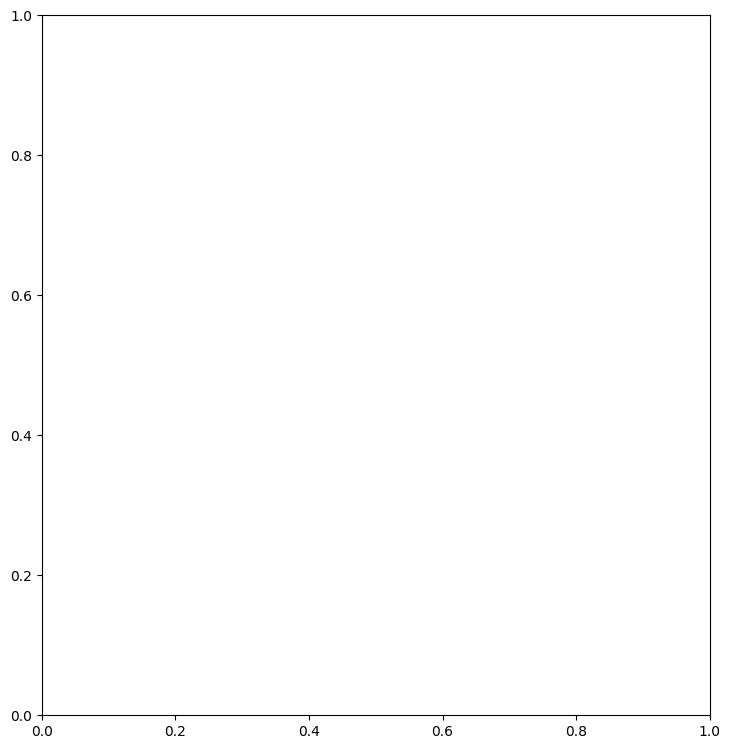

In [61]:
def makeplot(seed):
    rng = np.random.RandomState(seed)

    plt.figure(figsize=(50,20))
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(sample(RBMs, rng).reshape(28,28), cmap='gray')
        plt.axis('off')
    plt.show()

interactive(makeplot, seed=(0,10))

How good the model is at reconising the numbers.

In [59]:
def makeplot2(n, seed):
    rng = np.random.RandomState(seed)
    img = X_labeled_train[n]
    plt.figure(figsize = (50,20))
    plt.subplot(2,5,1)
    plt.imshow(img.reshape(28,28), cmap='gray')
    plt.axis('off')
    for i in range(9):
        x = img.reshape(1,-1)
        for rbm in RBMs:
            x = rbm._sample_hiddens(x,rng)
        for rbm in reversed(RBMs):
            x = rbm._sample_visibles(x,rng)
        plt.subplot(2,5,i+2)
        plt.imshow(x.reshape(28,28), cmap='gray')
        plt.axis('off')
    plt.show()
    
interactive(makeplot2, n=(0,20), seed = (0,20))

interactive(children=(IntSlider(value=10, description='n', max=20), IntSlider(value=10, description='seed', ma…

Evaluate on the epochs.

Evaluate on the evaluation metrics.

In [39]:
with open('DBN_2B.pickle', 'wb') as file:
    pickle.dump(RBMs, file)

In [40]:
with open('DBN_2B.pickle', 'rb') as file:
    RBMs = pickle.load(file)

Add minimum size layers: 10, 10

Uitleggen waarom welke activatie functie gebruikt bij elke layer.

In [41]:
import torch
import torch.nn as nn

# Define a PyTorch model
class RBMPyTorchModel(nn.Module):
    def __init__(self):
        super(RBMPyTorchModel, self).__init__()
        self.rbm1 = nn.Linear(784, 364, bias=True)
        self.rbm2 = nn.Linear(364, 91, bias=True)
        self.rbm3 = nn.Linear(91, 45, bias=True)
        self.rbm4 = nn.Linear(45, 10, bias=True)
        
        self.fc1 = nn.Linear(10, 1)
        self.fc2 = nn.Linear(1, 10)

    def forward(self, x):
        x = torch.sigmoid(self.rbm1(x))
        x = torch.sigmoid(self.rbm2(x))
        x = torch.sigmoid(self.rbm3(x))
        x = torch.sigmoid(self.rbm4(x))
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create a PyTorch model
model = RBMPyTorchModel()

# Transfer parameters to PyTorch model
with torch.no_grad():
    model.rbm1.weight.copy_(torch.tensor(RBMs[0].components_.T.T))
    model.rbm1.bias.copy_(torch.tensor(RBMs[0].intercept_hidden_))
    
    model.rbm2.weight.copy_(torch.tensor(RBMs[1].components_.T.T))
    model.rbm2.bias.copy_(torch.tensor(RBMs[1].intercept_hidden_))
    
    model.rbm3.weight.copy_(torch.tensor(RBMs[2].components_.T.T))
    model.rbm3.bias.copy_(torch.tensor(RBMs[2].intercept_hidden_))
    
    model.rbm4.weight.copy_(torch.tensor(RBMs[3].components_.T.T))
    model.rbm4.bias.copy_(torch.tensor(RBMs[3].intercept_hidden_))

# Freeze the first 3 layers
for param in model.rbm1.parameters():
    param.requires_grad = False
for param in model.rbm2.parameters():
    param.requires_grad = False
for param in model.rbm3.parameters():
    param.requires_grad = False
for param in model.rbm4.parameters():
    param.requires_grad = False
    
print(model)

RBMPyTorchModel(
  (rbm1): Linear(in_features=784, out_features=364, bias=True)
  (rbm2): Linear(in_features=364, out_features=91, bias=True)
  (rbm3): Linear(in_features=91, out_features=45, bias=True)
  (rbm4): Linear(in_features=45, out_features=10, bias=True)
  (fc1): Linear(in_features=10, out_features=1, bias=True)
  (fc2): Linear(in_features=1, out_features=10, bias=True)
)


In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

X_train = torch.tensor(X_labeled_train, dtype=torch.float32)
y_train = torch.tensor(y_labeled_train, dtype=torch.float32)

X_val = torch.tensor(X_labeled_validation, dtype=torch.float32)
y_val = torch.tensor(y_labeled_validation, dtype=torch.float32)

# Create TensorDataset
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

    # Validation loop
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}')

print("Training complete!")

Epoch [1/100], Loss: 2.6772, Val Loss: 2.3766
Epoch [2/100], Loss: 2.5215, Val Loss: 2.3145
Epoch [3/100], Loss: 2.3475, Val Loss: 2.2463
Epoch [4/100], Loss: 2.1334, Val Loss: 2.1700
Epoch [5/100], Loss: 1.9193, Val Loss: 2.0986
Epoch [6/100], Loss: 1.7359, Val Loss: 2.0361
Epoch [7/100], Loss: 1.5976, Val Loss: 1.9870
Epoch [8/100], Loss: 1.4884, Val Loss: 1.9484
Epoch [9/100], Loss: 1.4042, Val Loss: 1.9159
Epoch [10/100], Loss: 1.3509, Val Loss: 1.8899
Epoch [11/100], Loss: 1.3186, Val Loss: 1.8683
Epoch [12/100], Loss: 1.2844, Val Loss: 1.8497
Epoch [13/100], Loss: 1.2717, Val Loss: 1.8315
Epoch [14/100], Loss: 1.2390, Val Loss: 1.8146
Epoch [15/100], Loss: 1.2327, Val Loss: 1.7998
Epoch [16/100], Loss: 1.2355, Val Loss: 1.7869
Epoch [17/100], Loss: 1.2290, Val Loss: 1.7725
Epoch [18/100], Loss: 1.2187, Val Loss: 1.7622
Epoch [19/100], Loss: 1.2242, Val Loss: 1.7476
Epoch [20/100], Loss: 1.2152, Val Loss: 1.7350
Epoch [21/100], Loss: 1.2137, Val Loss: 1.7214
Epoch [22/100], Loss: 

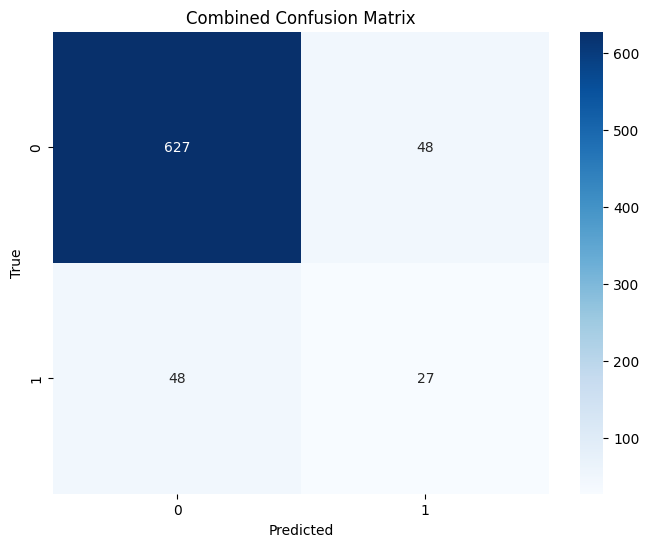

In [89]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix
import torch.nn.functional as F
import seaborn as sns


model.eval()

X_val = torch.tensor(X_labeled_validation, dtype=torch.float32)

# Get predictions
y_pred = model(X_val)

# Convert predictions to numpy array and get the predicted class labels
# y_pred_labels = y_pred.argmax(dim=1).detach().numpy()

# Get the predicted class labels
y_pred_labels = y_pred.argmax(dim=1)

# Convert to one-hot encoded format
y_pred_one_hot = F.one_hot(y_pred_labels, num_classes=y_pred.size(1))

# Convert to NumPy array
y_pred_one_hot_numpy = y_pred_one_hot.detach().numpy()

# Generate a confusion matrix
conf_matrix = multilabel_confusion_matrix(y_labeled_validation, y_pred_one_hot_numpy)


# Combine confusion matrices into a single confusion matrix
combined_conf_matrix = np.sum(conf_matrix, axis=0)

# Plot the combined confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(combined_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Combined Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Evaluate on the epochs.

Explain why the optimizer.

Evaluate on learning rate.

Evaluate on the metrics.

In [46]:
# Save the model
torch.save(model.state_dict(), 'model.pth')
print("Model saved!")

Model saved!


In [47]:
# Load the model
model = RBMPyTorchModel()  # Replace with your model class
model.load_state_dict(torch.load('model.pth'))
model.eval()  # Set the model to evaluation mode
print("Model loaded!")

Model loaded!


C:\Users\jelma\AppData\Local\Temp\ipykernel_16452\3057561021.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model.pth'))


In [48]:
print(model(X_train[0]))

tensor([-0.0906,  0.6218,  1.2428,  0.8199, -2.0184,  0.2138,  0.7977, -1.6023,
        -0.1422, -1.9288], grad_fn=<ViewBackward0>)


Compare final result to the null model.

Evaluate final model on the metrics (cross entropy or something).

Add an confusion matrics.

Manualy grade the results of the image.

Bonus:
Zou pca kunnen gebruiken om te kijken waarom het model somige getalen slechter herkend.